<a href="https://colab.research.google.com/github/abdul3909/Deep-Learning/blob/main/Digit%20Recognition/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [29]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

In [30]:
np.max(xtrain[0])

255

In [32]:
xtrain = xtrain / 255
xtest = xtest / 255

In [33]:
xtrain.shape

(60000, 28, 28)

In [34]:
xtrain_flat = xtrain.reshape(len(xtrain), 28*28)
xtest_flat = xtest.reshape(len(xtest), 28*28)

In [35]:
xtrain_flat.shape

(60000, 784)

In [36]:
xtrain_flat[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

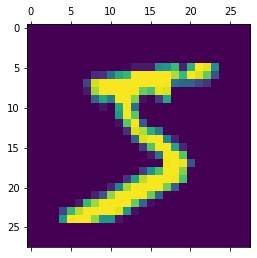

In [20]:
plt.matshow(xtrain[0])

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain_flat, ytrain, epochs=30)

In [41]:
model.evaluate(xtest_flat, ytest)

313/313 [==============================] - 0s 706us/step - loss: 0.5058 - accuracy: 0.8846


[0.5058358311653137, 0.8845999836921692]

In [43]:
y_predicted = model.predict(xtest_flat)
y_predicted[0]

array([0.12973222, 0.02914792, 0.13375679, 0.39088535, 0.28753018,
       0.24283728, 0.01784915, 0.99030983, 0.13624626, 0.72398794],
      dtype=float32)

In [45]:
np.argmax(y_predicted[0])

7

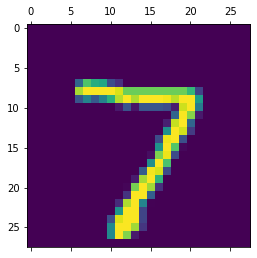

In [46]:
plt.matshow(xtest[0])

In [47]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 4, 9]

In [48]:
cm = tf.math.confusion_matrix(labels=ytest, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    2,    2,    0,    7,   12,    1,    4,    0],
       [   0, 1096,    5,    3,    0,    4,    5,    0,   22,    0],
       [  15,   18,  860,   24,   16,    2,   24,   23,   44,    6],
       [   5,   10,   21,  885,    1,   29,    7,   19,   23,   10],
       [   2,    9,    3,    0,  879,    2,   16,    2,    8,   61],
       [  14,   19,    4,   64,   24,  694,   19,   13,   26,   15],
       [  15,    9,   13,    1,   14,   22,  881,    0,    3,    0],
       [   1,   31,   21,    4,   13,    0,    1,  911,    5,   41],
       [  10,   23,   13,   35,   14,   25,   11,   13,  811,   19],
       [  15,   11,    8,   11,   44,    7,    0,   28,    8,  877]],
      dtype=int32)>

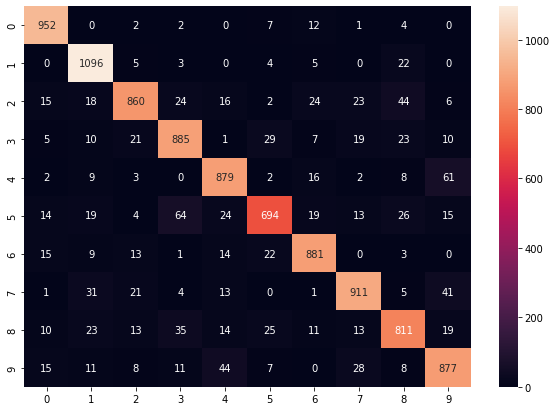

In [53]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain_flat, ytrain, epochs=30)

In [56]:
model.evaluate(xtest_flat, ytest)

313/313 [==============================] - 0s 868us/step - loss: 0.1593 - accuracy: 0.9548


[0.15933693945407867, 0.954800009727478]

In [60]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain, ytrain, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2339 - accuracy: 0.7136
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5188 - accuracy: 0.8674
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4007 - accuracy: 0.8906
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3551 - accuracy: 0.9012
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3296 - accuracy: 0.9062
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3121 - accuracy: 0.9105
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2993 - accuracy: 0.9144
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2889 - accuracy: 0.9168
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2794 - accuracy: 0.9192
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.270

In [66]:
model.evaluate(xtest_flat, ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9518


[0.16109098494052887, 0.9517999887466431]